In [1]:
import glob
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,7.5]

In [2]:
lc_fnames = sorted(glob.glob('pps/P*70901M*X*SRCTSR*.FTZ'))

lcs = []
slcs = []
hlcs = []
for file in lc_fnames:
    hdul = fits.open(file)
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    err = hdul[1].data.field('ERROR')
    soft = hdul[1].data.field('RATE1') + hdul[1].data.field('RATE2') + hdul[1].data.field('RATE3')
    hard = hdul[1].data.field('RATE4') + hdul[1].data.field('RATE5')
    ers = hdul[1].data.field('RATE1_ERR') + hdul[1].data.field('RATE2_ERR') + hdul[1].data.field('RATE3_ERR')
    erh = hdul[1].data.field('RATE4_ERR') + hdul[1].data.field('RATE5_ERR')
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, err, gti=gtis, input_counts=False))
    slcs.append(Lightcurve(time, soft, ers, gti=gtis, input_counts=False))
    hlcs.append(Lightcurve(time, hard, erh, gti=gtis, input_counts=False))
    

In [3]:
lc_fnames

['pps/P0886070901M1X000SRCTSR801C.FTZ', 'pps/P0886070901M2X000SRCTSR801C.FTZ']

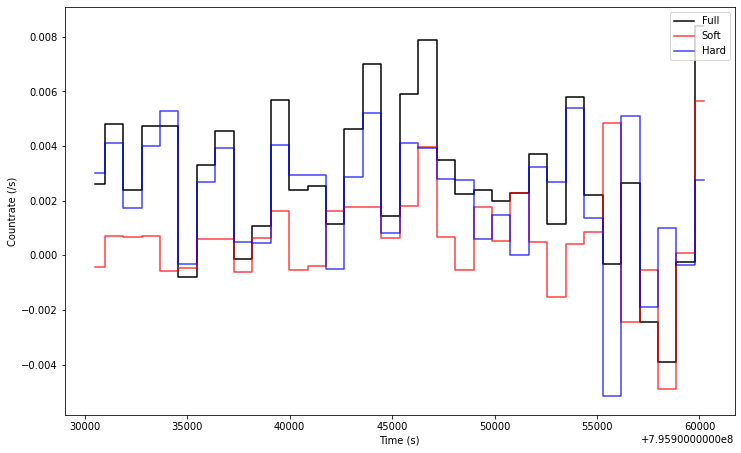

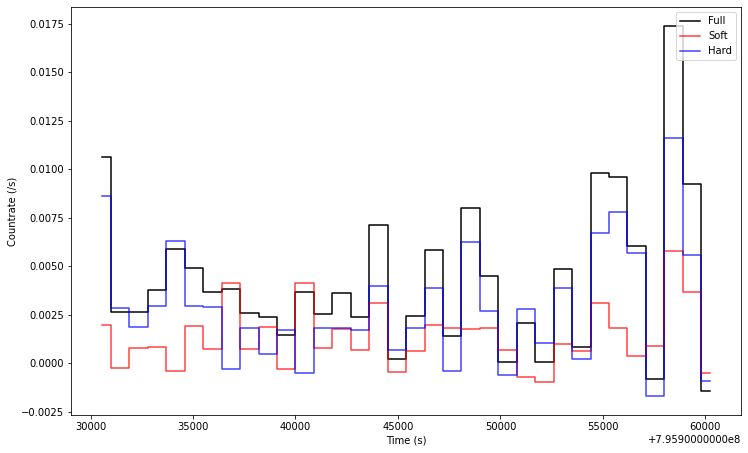

In [4]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].time, lcs[i].countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].time, slcs[i].countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].time, hlcs[i].countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()

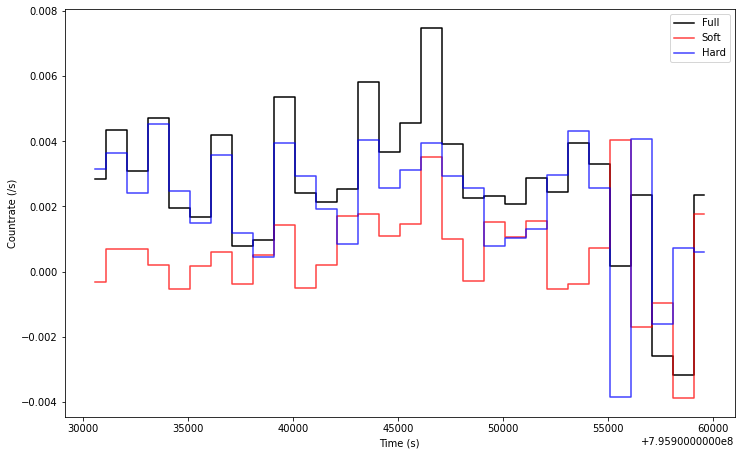

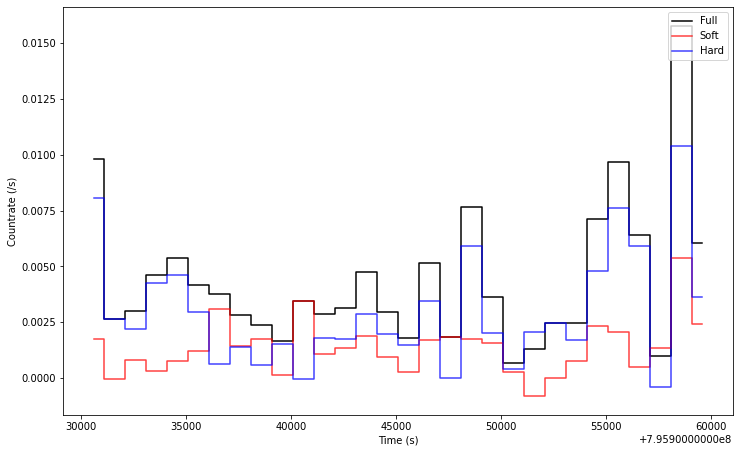

In [5]:
for i in range(len(lcs)):
    plt.xlabel('Time (s)')
    plt.ylabel('Countrate (/s)')
    plt.plot(lcs[i].rebin(1000).time, lcs[i].rebin(1000).countrate, color='k', ds='steps-mid', label='Full')
    plt.plot(slcs[i].rebin(1000).time, slcs[i].rebin(1000).countrate, color='r', ds='steps-mid', alpha=0.75, label='Soft')
    plt.plot(hlcs[i].rebin(1000).time, hlcs[i].rebin(1000).countrate, color='b', ds='steps-mid', alpha=0.75, label='Hard')
    plt.legend(loc='upper right')
    for j in range(len(gtis)-1):
        plt.axvspan(gtis[j][1],gtis[j+1][0],color='purple',alpha=0.25)
    plt.show()